In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import mysql.connector


In [3]:
import pandas as pd
import pymysql

# Database connection parameters
db_config = {
    'host': 'localhost',  # or the IP address of your MySQL server
    'port': 3306,         # default MySQL port
    'user': 'myuser',
    'password': 'mypassword',
    'database': 'exped_cluster_db'
}

# Establishing the connection
connection = pymysql.connect(
    host=db_config['host'],
    port=db_config['port'],
    user=db_config['user'],
    password=db_config['password'],
    database=db_config['database']
)

# SQL query to fetch data
query = "SELECT * FROM collectingevent"

# Reading the data into a pandas DataFrame
df = pd.read_sql(query, connection)

# Closing the connection
connection.close()

# Displaying the first few rows of the DataFrame
df.head()


/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_1725/897154596.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,CollectingEventID,TimestampCreated,TimestampModified,Version,EndDate,EndDatePrecision,EndDateVerbatim,EndTime,Method,Remarks,...,StationFieldNumberModifier1,StationFieldNumberModifier2,StationFieldNumberModifier3,Text3,Text4,Text5,Text6,Text7,Text8,UniqueIdentifier
0,1,2007-03-21 16:23:34,2007-03-21 16:23:34,2,None,0.0,None,None,None,Rhododendron-bamboo thicket with scattered Abies.,...,None,None,None,None,None,None,None,None,None,None
1,2,2007-03-21 16:23:27,2017-06-07 16:46:53,2,None,0.0,None,None,None,"Selva baja caducifolia, Ruderal. Secund.",...,None,None,None,None,None,None,None,None,None,None
2,3,2007-03-21 16:23:48,2010-10-05 14:21:32,1,1922-08-10,1.0,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4,2012-05-16 16:31:38,2012-05-17 14:43:24,2,None,1.0,None,None,None,atop sea bluffs. With Dudleya edulis over a l...,...,None,None,None,None,None,None,None,None,None,None
4,5,2009-05-22 16:17:06,2009-05-22 16:19:59,1,1964-03-01,2.0,None,None,None,Slope with Quercus,...,None,None,None,None,None,None,None,None,None,None


In [4]:
import pymysql
import pandas as pd

# # Database connection parameters
# db_params = {
#     'host': 'localhost',  # Replace with your database host
#     'user': 'your_username',  # Replace with your database username
#     'password': 'your_password',  # Replace with your database password
#     'database': 'your_database_name'  # Replace with your database name
# }

# Create a connection to the database
connection = pymysql.connect(**db_config)

try:
    # Create a cursor object
    with connection.cursor() as cursor:
        # Define the SQL query
        query = """
        SELECT
            c.StartDate,
            c.EndDate,
            l.LocalityName,
            l.Latitude1,
            l.Longitude1
        FROM
            collectingevent c
        JOIN
            locality l ON c.LocalityID = l.LocalityID
        """

        # Execute the query
        cursor.execute(query)

        # Fetch all the results
        results = cursor.fetchall()

        # Create a DataFrame from the results
        df = pd.DataFrame(results, columns=['StartDate', 'EndDate', 'LocalityName', 'Latitude1', 'Longitude1'])


finally:
    # Close the database connection
    connection.close()


In [5]:
df

,StartDate,EndDate,LocalityName,Latitude1,Longitude1
0,2005-08-17,None,"Yaduo Cun, NE of Yaping Yakou at the Myanmar b...",27.2176418304,98.7052230835
1,1988-08-19,None,"El Zapotal, al SE de Tuxtla Gutierrez.",None,None
2,1922-08-10,1922-08-10,Medow W of Gutzman's.,41.3044000000,-121.0368000000
3,1964-01-01,1964-03-01,Near Tenejapa Center.,None,None
4,1992-02-18,None,Limón Province. Rainforest slopes of Cerro Sk...,None,None
...,...,...,...,...,...
777230,2020-04-09,None,"NW side Stewart Valley, 8.6 road miles N of hi...",36.2797000000,-116.1691000000
777231,2023-06-02,None,"Big Smoky Valley, 2.7 road miles NNE of Gabbs ...",38.5302000000,-117.5463400000
777232,2022-04-08,None,Garner Valley Watershed. W of Morris Ranch Roa...,33.6333333333,-116.6000000000
777233,2023-08-22,None,"Snake Mountains, canyon on W side of Little De...",41.7449400000,-114.9455800000


In [6]:
df.dtypes

StartDate       object
EndDate         object
LocalityName    object
Latitude1       object
Longitude1      object
dtype: object

In [7]:
data = df

In [9]:
data['Latitude1'] = data['Latitude1'].astype('float64')
data['Longitude1'] = data['Longitude1'].astype('float64')

In [10]:
#Continental US bounding box
data_us = data[(data['Latitude1'] >= 24.396308) & (data['Latitude1'] <= 49.384358) &
               (data['Longitude1'] >= -125.0) & (data['Longitude1'] <= -66.93457)]

features = data_us[['Latitude1', 'Longitude1']]

features = features.dropna()

# Scale the features
#scaler = StandardScaler()
#features_scaled = scaler.fit_transform(features)

dbscan = DBSCAN(eps=0.04, min_samples=10)
clusters = dbscan.fit_predict(features)
#clusters = dbscan.fit_predict(features_scaled)

data_us['cluster'] = clusters

/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_1725/3337785359.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_us['cluster'] = clusters


In [11]:
data_us.dtypes

StartDate        object
EndDate          object
LocalityName     object
Latitude1       float64
Longitude1      float64
cluster           int64
dtype: object

In [12]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon
import geopandas as gpd
import alphashape

def create_alpha_shapes(df, alpha=0.1):
    polygons = []
    for cluster in df['cluster'].unique():
        if cluster == -1:
            continue
        points = df[df['cluster'] == cluster][['Longitude1', 'Latitude1']].values
        if len(points) < 3:
            continue  # Skip clusters with fewer than 3 points
        try:
            alpha_shape = alphashape.alphashape(points, alpha)
            if alpha_shape.geom_type == 'Polygon':
                polygons.append({'cluster': cluster, 'geometry': alpha_shape})
            elif alpha_shape.geom_type == 'MultiPolygon':
                for poly in alpha_shape:
                    polygons.append({'cluster': cluster, 'geometry': poly})
        except Exception as e:
            #print(f"Skipping cluster {cluster} due to error: {e}")
            continue
    return polygons

polygons = create_alpha_shapes(data_us)

# Create a GeoDataFrame from the polygons
gdf = gpd.GeoDataFrame(polygons)

shapefile_path = './data/110m_cultural/ne_110m_admin_0_countries.shp'

world = gpd.read_file(shapefile_path)
us = world[(world.ADMIN == "United States of America")]


us = us.cx[-125:-66.93457, 24.396308:49.384358]



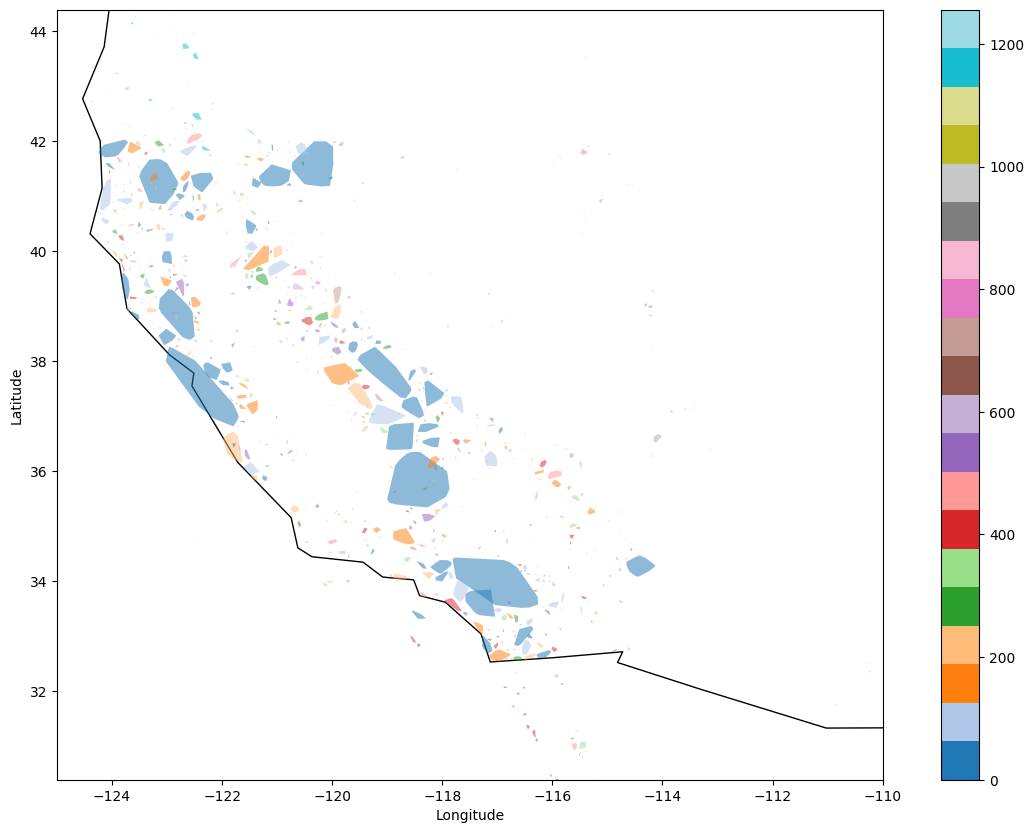

In [13]:
# Plot the map with the clusters
fig, ax = plt.subplots(figsize=(15, 10))
us.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, column='cluster', cmap='tab20', legend=True, alpha=0.5)

# Set axis limits to focus on the continental US
ax.set_xlim(-125, -110)
ax.set_ylim(30.396308, 44.384358)
ax.set_aspect('equal')

#plt.title('DBSCAN Clusters as Regions (Polygons) Overlaid on Western US Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('dbscan_hulls.png')
plt.show()

In [14]:
import geopandas as gpd

# Path to the shapefile
shapefile_path = './data/110m_cultural/ne_110m_admin_0_countries.shp'

# Load the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the GeoDataFrame
print(gdf.head())


        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

In [15]:
world

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


In [16]:
world[(world.ADMIN == "United States of America")]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [17]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
labels = data_us['cluster']
sil_score = silhouette_score(features, labels)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: -0.033584092322764936
